### Sample and perform an 8-point DFT on a continuous input signal x(t) = sin(2π⋅1000⋅t) + sin(2π⋅2000⋅t+3π/4)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
import math

In [16]:
def dft(x_n, N):
    X_m = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X_m[m] += x_n[n] * np.exp(-2j * np.pi * m * n / N)
    return X_m

def phase(X_m, N):
    X_phase = []
    for z in X_m:
        phase = cm.phase(round(z.real) + round(z.imag) * 1j) #radian
        X_phase.append(math.degrees(phase))
    return X_phase

def idft(X_m, N):
    x_n = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for m in range(N):
            x_n[n] += X_m[m] * np.exp(2j * np.pi * n * m / N)
        x_n[n] = x_n[n] / N
    return x_n

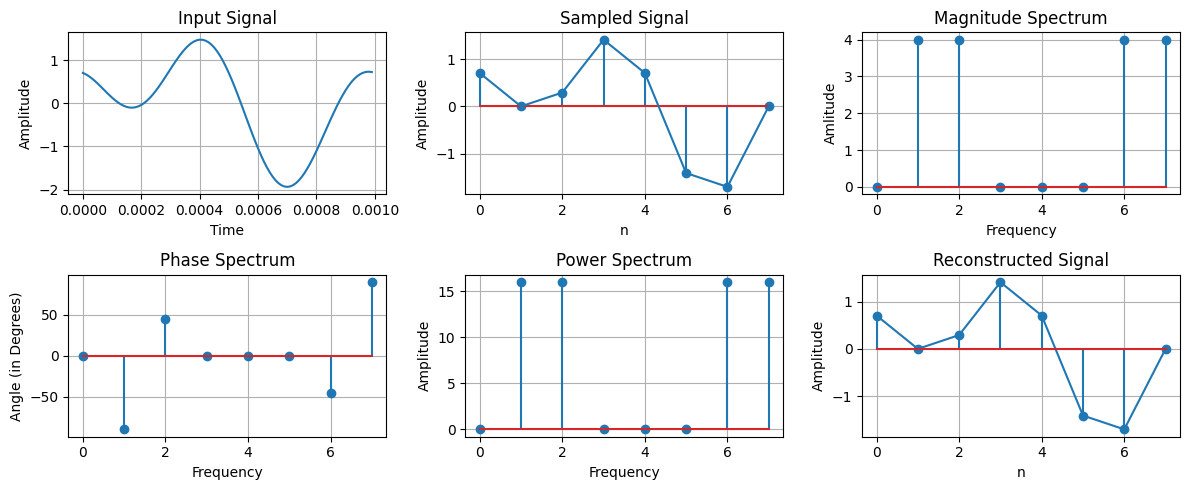

In [21]:
t = np.arange(0, 0.001, 0.00001)
x = np.sin(2 * np.pi * 1000 * t) + np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.figure(figsize=(12, 5))

plt.subplot(2, 3, 1)
plt.plot(t, x)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')

fs = 8000
n = np.arange(0, 0.001, 1/fs)
x_n = np.sin(2 * np.pi * 1000 * n) + np.sin(2 * np.pi * 2000 * n + 3 * np.pi / 4)

plt.subplot(2, 3, 2)
plt.stem(x_n)
plt.plot(x_n)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')


N = 8
X_m = dft(x_n, N)
plt.subplot(2, 3, 3)
plt.stem(np.abs(X_m))
plt.grid(True)
plt.ylabel('Amlitude')
plt.xlabel('Frequency')
plt.title('Magnitude Spectrum')

X_phase = phase(X_m, N)
plt.subplot(2, 3, 4)
plt.stem(X_phase)
plt.grid(True)
plt.ylabel('Angle (in Degrees)')
plt.xlabel('Frequency')
plt.title('Phase Spectrum')

plt.subplot(2, 3, 5)
plt.stem(np.abs(X_m) ** 2)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.title('Power Spectrum')

x_n = idft(X_m, N)
plt.subplot(2, 3, 6)
plt.plot(x_n.real)
plt.stem(x_n.real)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()